In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression

In [2]:
class LassoRegression(LinearRegression) :
    def __init__ (self, learning_rate = 0.1, iterations = 100, verbose = True, lambda_ = 0.1):
        super().__init__(learning_rate, iterations, verbose)
        self.lambda_ = lambda_

    def compute_loss(self,Y_pred,Y):
        return np.mean(np.sum((Y - Y_pred) ** 2, axis=1)) + np.sum(np.abs(self.W))

    def compute_grad(self,X,Y_pred,Y):
        n = X.shape[0]
        grad_w = (2/n)*((X.T) @ (Y_pred - Y)) + self.lambda_*np.sign(self.W)
        grad_b = (2/n)*np.sum(Y_pred - Y,axis = 0)
        return grad_w, grad_b

In [3]:
df = pd.read_csv('Boston_Housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
X = df.drop(['PRICE'],axis = 1).values
y = df[['PRICE']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404, 1)


In [6]:
my_model = LinearRegression(learning_rate = 0.1, iterations = 100)
my_model.fit(X_train,y_train)
print(f"Weights = {my_model.W}")
print(f"Bias = {my_model.b}")

Iteration 0, Loss: 596.4408910891088
Iteration 50, Loss: 19.536321973625395
Weights = [[-0.92445054]
 [ 0.97278381]
 [-0.17599784]
 [ 0.62497183]
 [-1.71786841]
 [ 2.63507644]
 [-0.13832689]
 [-2.81970251]
 [ 1.58288301]
 [-1.31467161]
 [-2.25812692]
 [ 0.71427423]
 [-3.56153586]]
Bias = [22.61188118]


In [7]:
y_pred = my_model.predict(X_test)
print(f"Loss : {my_model.compute_loss(y_pred,y_test)}")

Loss : 33.88400045725756


In [8]:
my_model_lasso = LassoRegression(learning_rate = 0.1, iterations = 100, lambda_=1)
my_model_lasso.fit(X_train,y_train)
print(f"Weights = {my_model_lasso.W}")
print(f"Bias = {my_model_lasso.b}")

Iteration 0, Loss: 596.4408910891088
Iteration 50, Loss: 32.58273586626228
Weights = [[-2.46801974e-01]
 [ 7.31621899e-02]
 [-9.96510294e-02]
 [ 3.48311952e-01]
 [ 2.70104211e-02]
 [ 2.84304657e+00]
 [-4.24305118e-02]
 [-3.86527903e-02]
 [ 1.00923858e-03]
 [-1.12391347e-01]
 [-1.99309224e+00]
 [ 4.19852962e-01]
 [-3.47593288e+00]]
Bias = [22.61188118]


In [9]:
y_pred_lasso = my_model_lasso.predict(X_test)
print(f"Loss : {my_model.compute_loss(y_pred_lasso,y_test)}")

Loss : 39.66105446731088


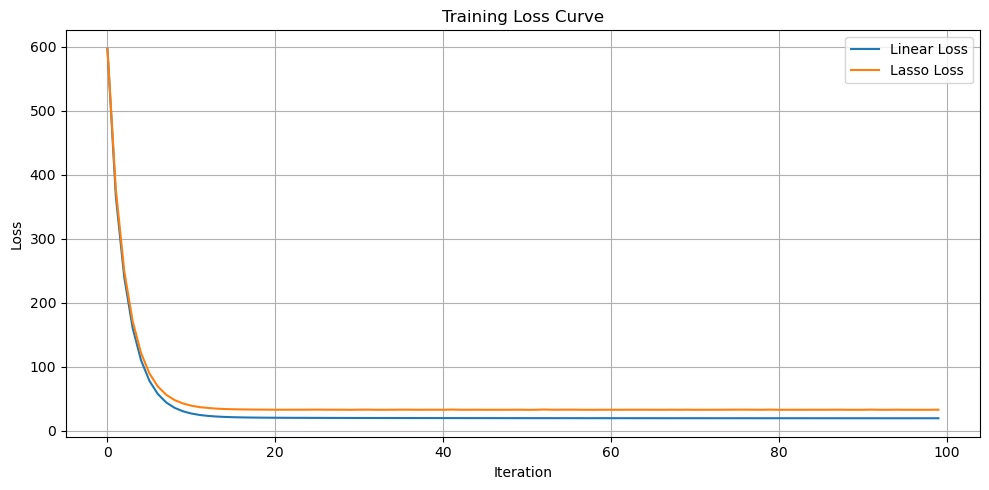

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(my_model.loss_history, label='Linear Loss')
plt.plot(my_model_lasso.loss_history, label='Lasso Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

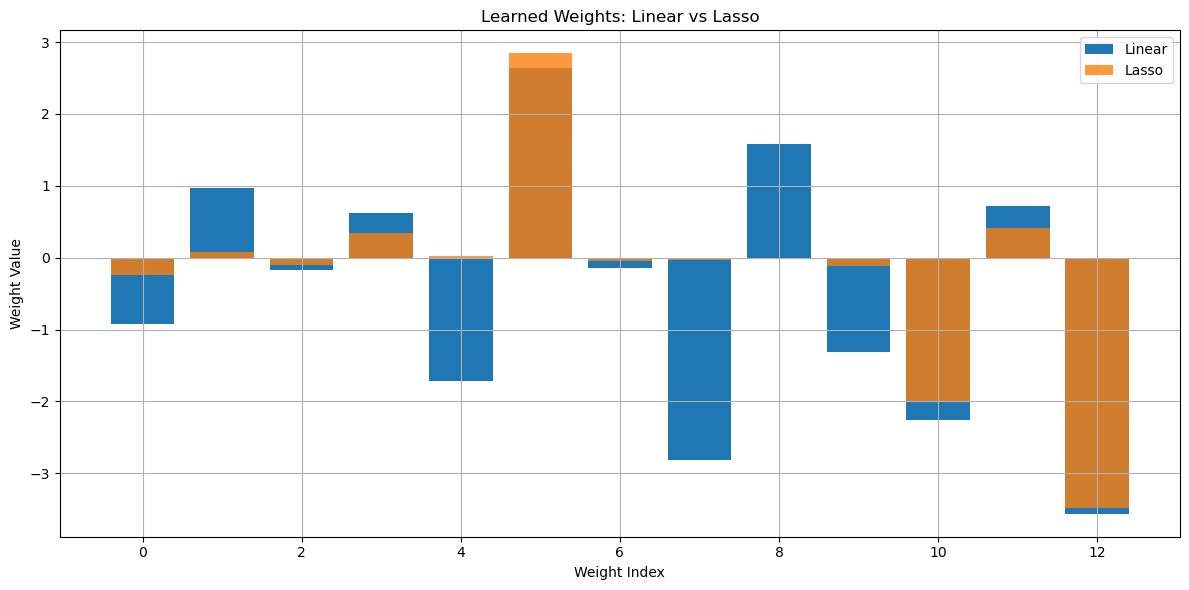

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(my_model.W.flatten())), my_model.W.flatten(), label='Linear')
plt.bar(range(len(my_model_lasso.W.flatten())), my_model_lasso.W.flatten(), alpha=0.8, label='Lasso')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Learned Weights: Linear vs Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()